In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_set = pd.read_csv('https://raw.githubusercontent.com/siddhantbhattarai/Machine_Learning_Bootcamp_2024/refs/heads/main/Datasets/diabetes_prediction_dataset.csv')
data_set.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
data_set.shape

(100000, 9)

In [4]:
data_set.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
print("The no. of duplicated rows:", data_set.duplicated().sum())

The no. of duplicated rows: 3854


In [6]:
print("The Null values per column:\n", data_set.isnull().sum())

The Null values per column:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [7]:
data_set.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [8]:
# Rename the diabetes column to Outcome
data_set.rename(columns={'diabetes': 'Outcome'}, inplace=True)

# Verify the change
print("Updated columns:", data_set.columns)

Updated columns: Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'Outcome'],
      dtype='object')


In [9]:
# Check unique values in the diabetes (Outcome) column
unique_values = data_set['Outcome'].unique()
print("Unique values in the Outcome column:", unique_values)

Unique values in the Outcome column: [0 1]


In [10]:
# Count the unique values in the Outcome column
outcome_counts = data_set['Outcome'].value_counts()
print("Unique value counts in the Outcome column:\n", outcome_counts)

Unique value counts in the Outcome column:
 Outcome
0    91500
1     8500
Name: count, dtype: int64


In [11]:
data_set = data_set.drop_duplicates()

In [12]:
print("The no. of duplicated rows after cleaning:", data_set.duplicated().sum())

The no. of duplicated rows after cleaning: 0


In [13]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   Outcome              96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


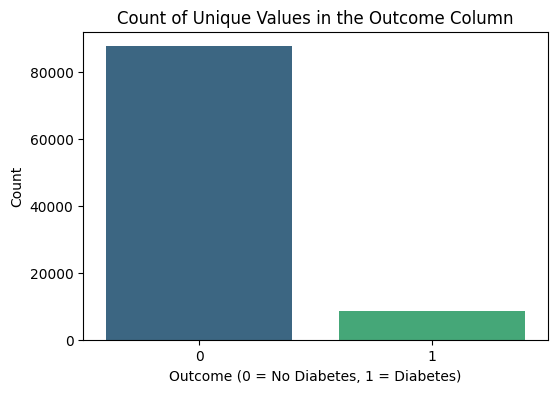

In [14]:
# Updated count plot to avoid FutureWarning
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=data_set, hue='Outcome', dodge=False, palette='viridis', legend=False)
plt.title("Count of Unique Values in the Outcome Column")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Count")
plt.show()


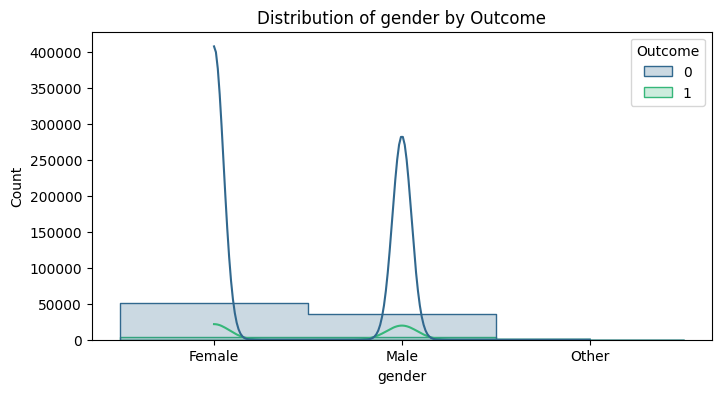

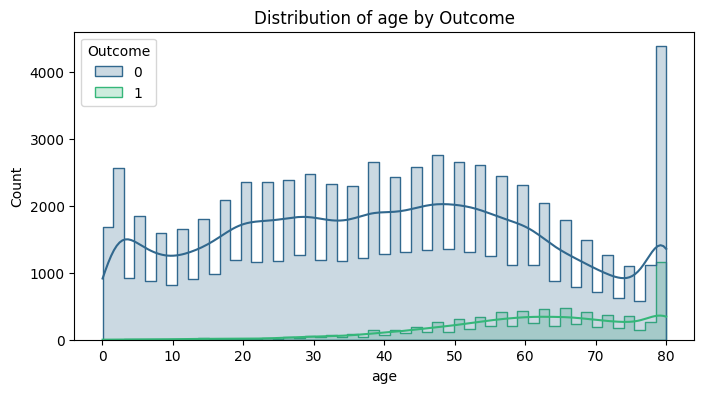

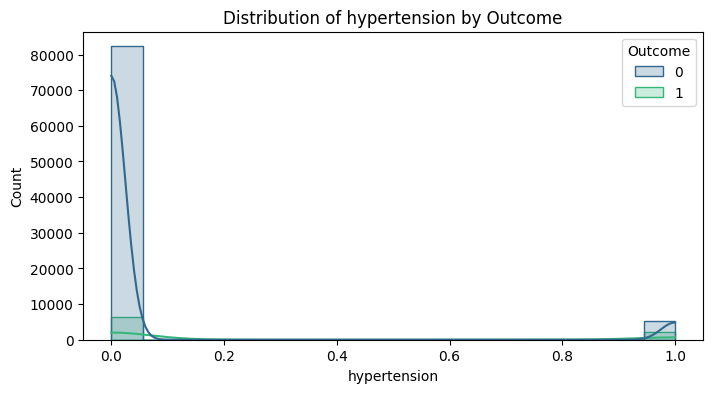

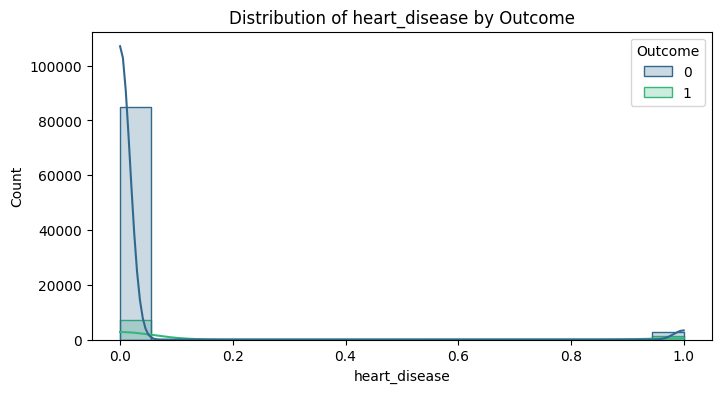

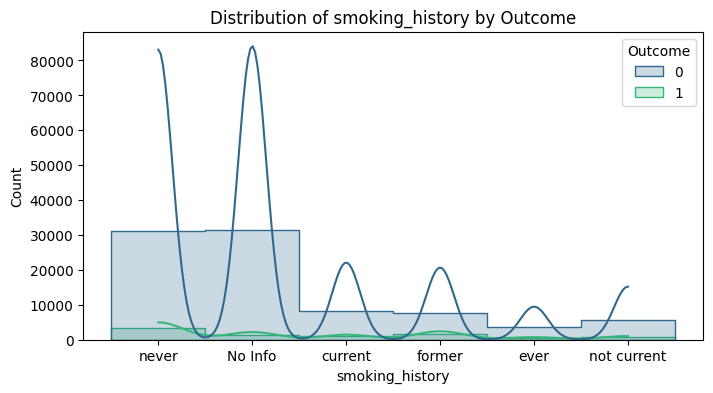

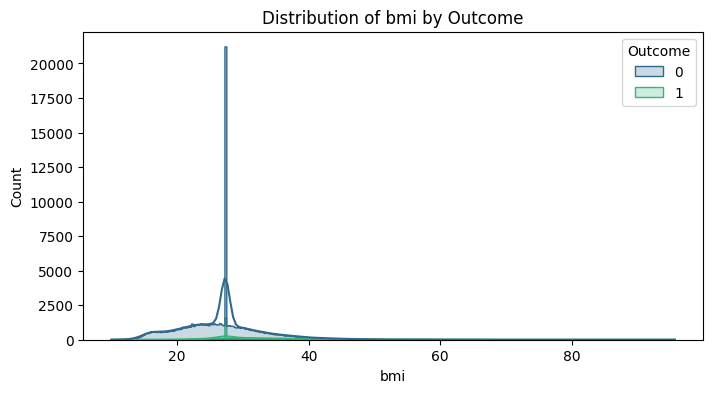

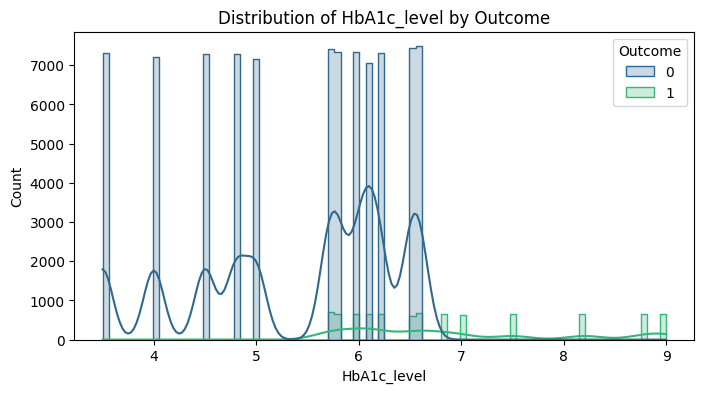

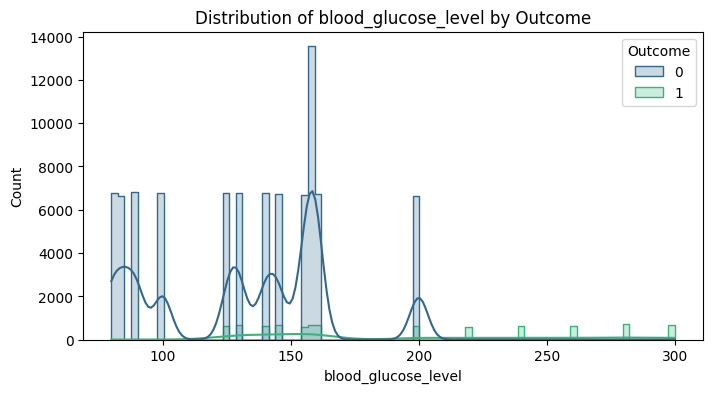

In [15]:
# Plot distributions of each feature grouped by Outcome
for column in data_set.columns[:-1]:  # Exclude 'Outcome' from the loop
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data_set, x=column, hue='Outcome', kde=True, palette='viridis', element='step')
    plt.title(f"Distribution of {column} by Outcome")
    plt.show()

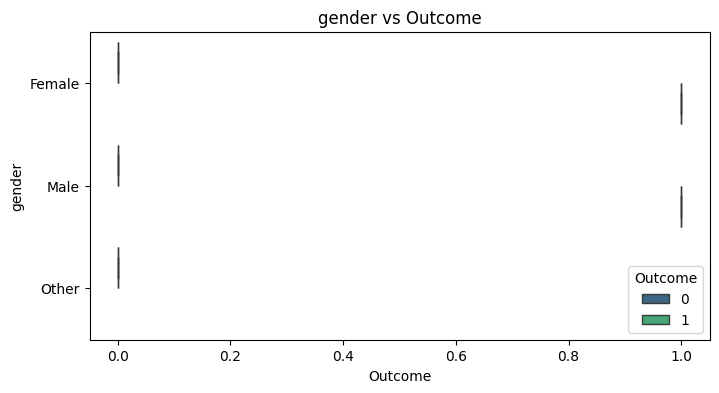

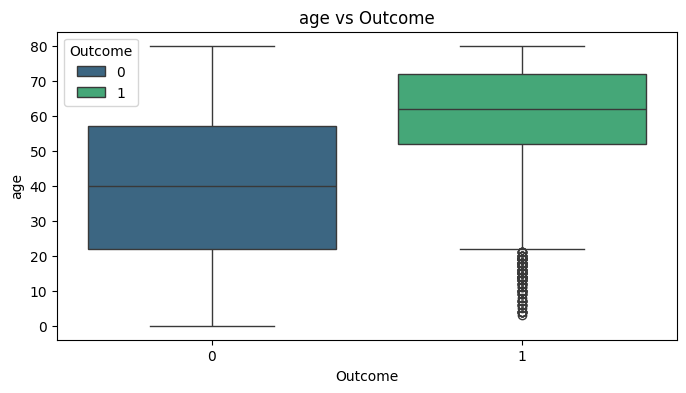

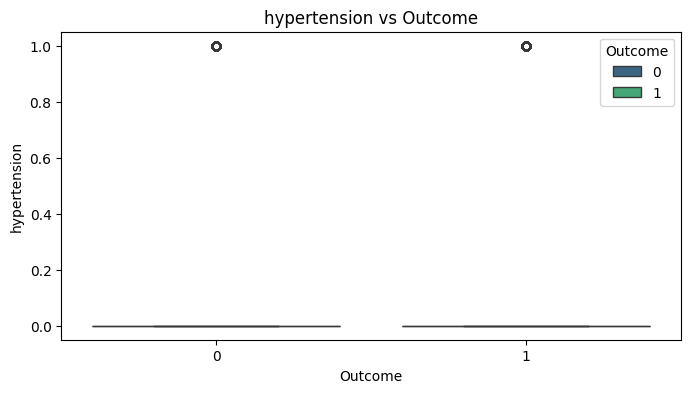

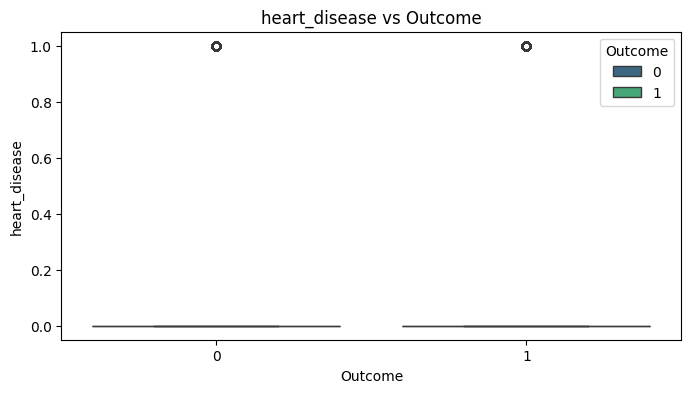

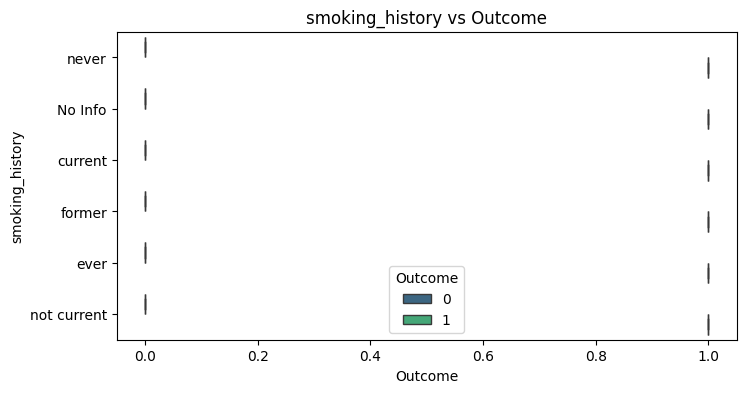

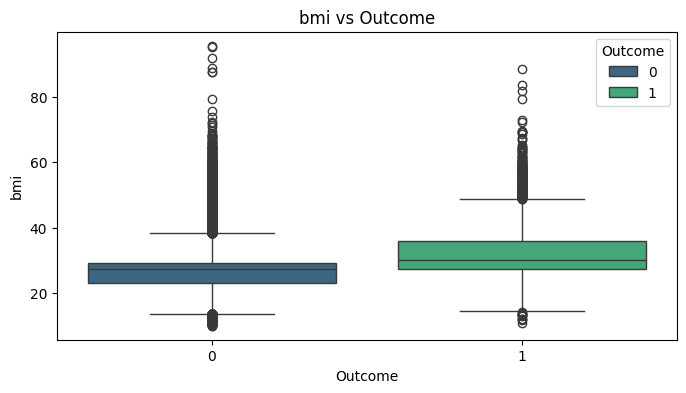

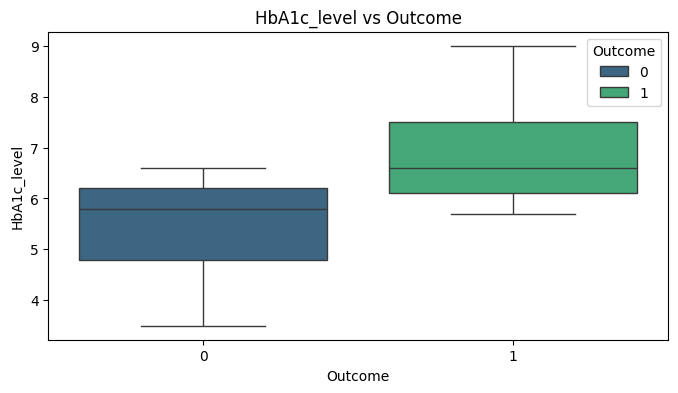

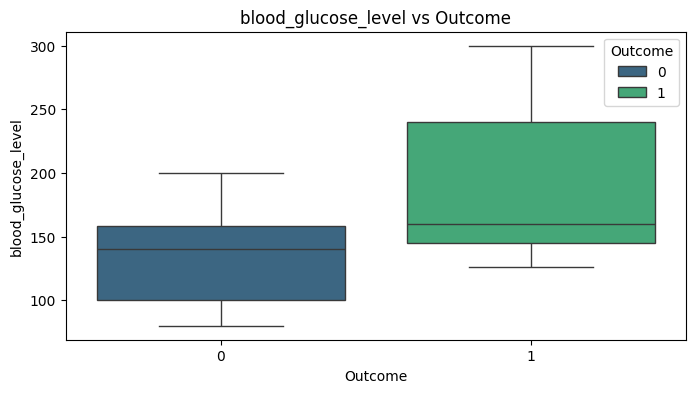

In [16]:
# Box plots for each feature based on Outcome
for column in data_set.columns[:-1]:  # Exclude 'Outcome' from the loop
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Outcome', y=column, data=data_set, hue = "Outcome", palette='viridis')
    plt.title(f"{column} vs Outcome")
    plt.show()

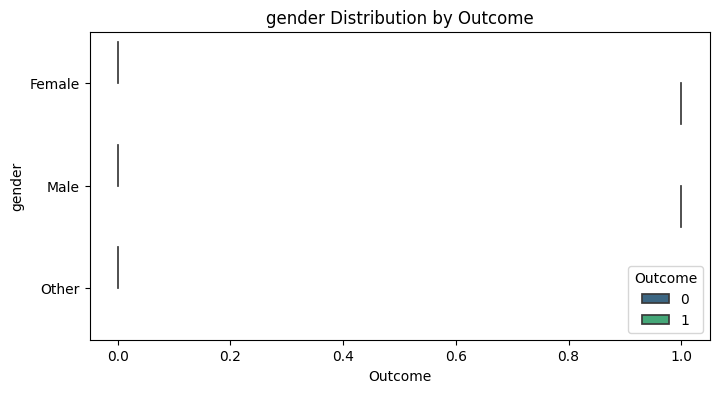

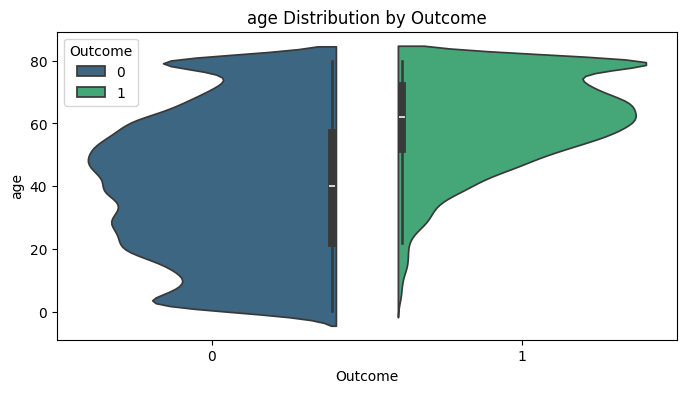

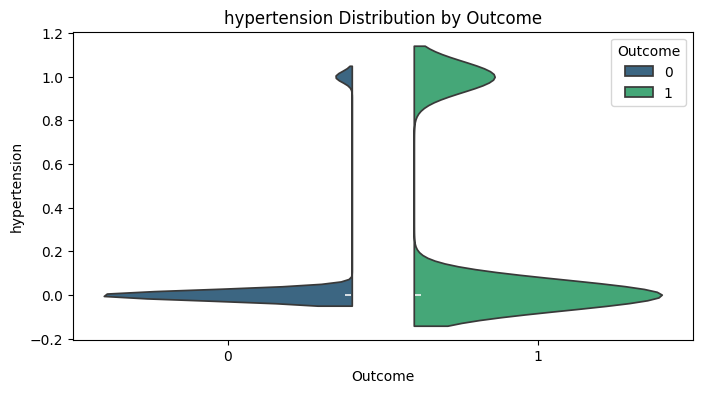

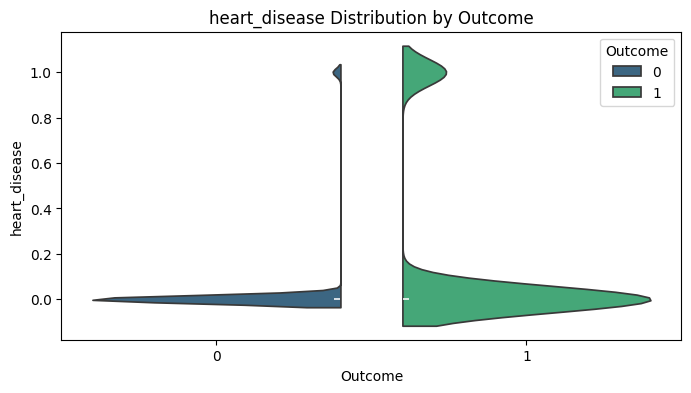

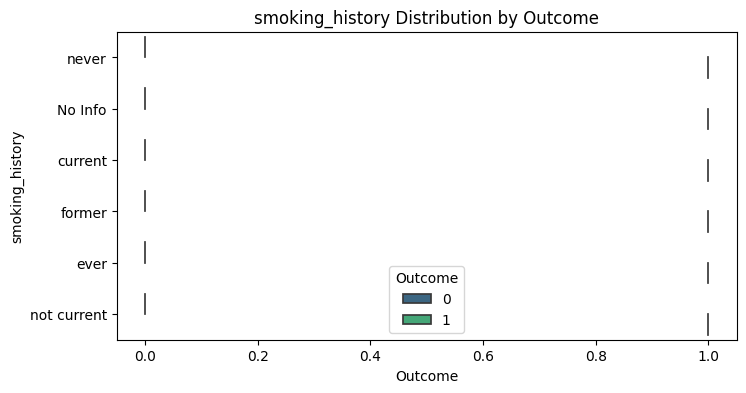

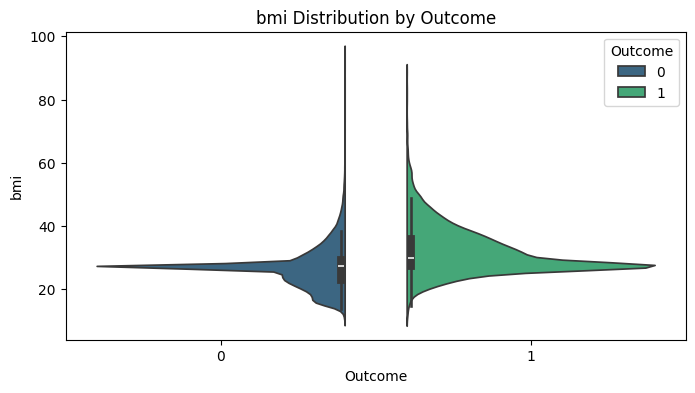

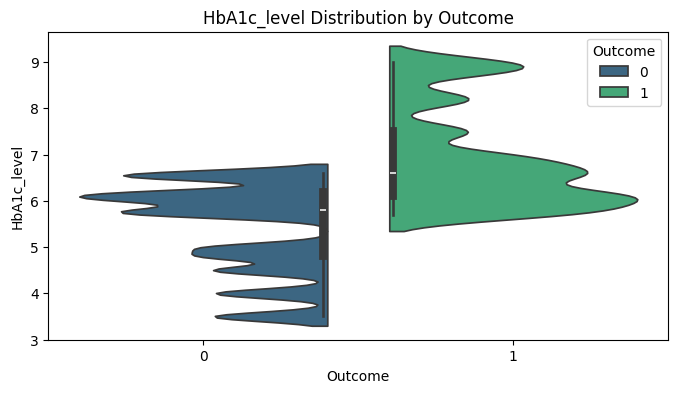

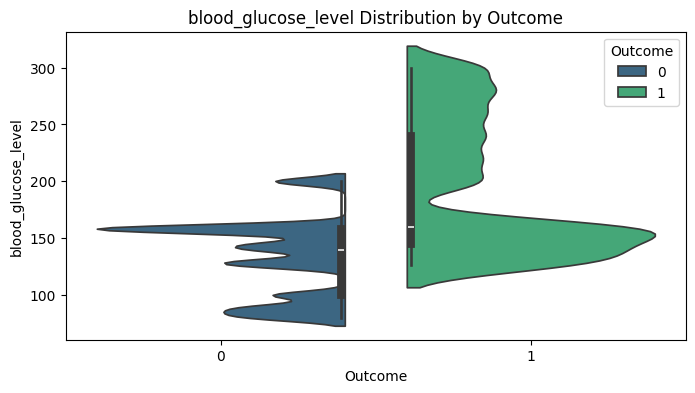

In [17]:
# Violin plots for each feature based on Outcome
for column in data_set.columns[:-1]:  # Exclude 'Outcome' from the loop
    plt.figure(figsize=(8, 4))
    sns.violinplot(x='Outcome', y=column, data=data_set, hue = "Outcome",palette='viridis', split=True)
    plt.title(f"{column} Distribution by Outcome")
    plt.show()

In [18]:
# Check for non-numeric columns
print("Data types in data_set:\n", data_set.dtypes)

Data types in data_set:
 gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
Outcome                  int64
dtype: object


In [19]:
# Encode categorical variables
# Using get_dummies for one-hot encoding
data_set = pd.get_dummies(data_set, drop_first=True)

In [20]:
# Confirm encoding
print("Updated data types after encoding:\n", data_set.dtypes)

Updated data types after encoding:
 age                            float64
hypertension                     int64
heart_disease                    int64
bmi                            float64
HbA1c_level                    float64
blood_glucose_level              int64
Outcome                          int64
gender_Male                       bool
gender_Other                      bool
smoking_history_current           bool
smoking_history_ever              bool
smoking_history_former            bool
smoking_history_never             bool
smoking_history_not current       bool
dtype: object


In [21]:
# Step 3: Data Preprocessing
# Separate features and target variable (assuming target column is labeled 'Outcome')
X = data_set.drop('Outcome', axis=1)  # Features
y = data_set['Outcome']    

In [22]:
from sklearn.preprocessing import StandardScaler
# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [26]:
# Step 5: Model Selection and Training
# Initialize four different classifiers
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

In [27]:
# Train each model and store results
model_results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_results[model_name] = {
        "Accuracy": accuracy,
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred)
    }
    print(f"\n{model_name} Model Evaluation")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", model_results[model_name]["Confusion Matrix"])
    print("Classification Report:\n", model_results[model_name]["Classification Report"])


Logistic Regression Model Evaluation
Accuracy: 0.9570982839313572
Confusion Matrix:
 [[17325   184]
 [  641  1080]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     17509
           1       0.85      0.63      0.72      1721

    accuracy                           0.96     19230
   macro avg       0.91      0.81      0.85     19230
weighted avg       0.95      0.96      0.95     19230


Random Forest Model Evaluation
Accuracy: 0.9685907436297452
Confusion Matrix:
 [[17446    63]
 [  541  1180]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.95      0.69      0.80      1721

    accuracy                           0.97     19230
   macro avg       0.96      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230


Support Vector Machine Model Evaluation
Accuracy: 0.960374414976599
C

In [28]:
# Final comparison of model performance
print("\nModel Comparison:")
for model_name, metrics in model_results.items():
    print(f"{model_name}: {metrics['Accuracy'] * 100:.2f}% Accuracy")


Model Comparison:
Logistic Regression: 95.71% Accuracy
Random Forest: 96.86% Accuracy
Support Vector Machine: 96.04% Accuracy
K-Nearest Neighbors: 95.80% Accuracy


In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load and prepare the data
def prepare_data():
    # Load data
    data_set = pd.read_csv('https://raw.githubusercontent.com/siddhantbhattarai/Machine_Learning_Bootcamp_2024/refs/heads/main/Datasets/diabetes_prediction_dataset.csv')
    
    # Rename diabetes to Outcome
    data_set.rename(columns={'diabetes': 'Outcome'}, inplace=True)
    
    # Remove duplicates
    data_set = data_set.drop_duplicates()
    
    # Encode categorical variables
    data_set = pd.get_dummies(data_set, drop_first=True)
    
    # Split features and target
    X = data_set.drop('Outcome', axis=1)
    y = data_set['Outcome']
    
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y, scaler, X.columns

def train_and_save_model():
    # Prepare data
    X_scaled, y, scaler, feature_names = prepare_data()
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # Create and train the model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Save the model, scaler, and feature names
    model_data = {
        'model': rf_model,
        'scaler': scaler,
        'feature_names': feature_names
    }
    
    joblib.dump(model_data, 'models/random_forest_model.pkl')
    
    # Test prediction
    y_pred = rf_model.predict(X_test)
    accuracy = (y_pred == y_test).mean()
    print(f"Model Accuracy: {accuracy * 100:.2f}%")
    
    return "Model saved successfully!"

if __name__ == "__main__":
    import os
    
    # Create models directory if it doesn't exist
    os.makedirs('models', exist_ok=True)
    
    # Train and save the model
    result = train_and_save_model()
    print(result)

Model Accuracy: 96.81%
Model saved successfully!
